# Werner State monogamy #
$$
\newcommand{\ket}[1]{|#1\rangle}
\newcommand{\bra}[1]{\langle #1|}
$$

The Werner states are a family of bipartite states $\rho(w)_{AB}$ which interpolate smoothly between the maximally entangled and the uncorrelated state. They are defined as:
$$
\rho(w)_{AB} = w\ket{\Phi_+}\bra{\Phi_+}_{AB} + (1-w)\frac{I_A}{2} \otimes \frac{I_B}{2}
$$
with
$$
\ket{\Phi_+} = \frac{\ket{00}+\ket{11}}{\sqrt{2}}
$$
Being the EPR-pair.

We know that for $w = 1$ we have a maximally entangled state, which is monogamous and can thus only be shared by two parties. However, if we lower $w$, entanglements with third parties becomes possible. The research question now is the following:

Given a bipartite state $\sigma_{AB}$, what is the largest integer $k$ such that there exists a state $\sigma_{AB_1B_2\ldots B_k}$ with the correct marginals $\sigma_{AB_j} = \sigma_{AB}$ for every $j = 1, 2, \ldots, k$? This value shall be denoted with $k_{max}$. You can think of $k_{max}$ as the maximal number of partners that Alice can share a werner-state with a given parameter of $w$.

The following script will determine numerically the values of $w$ for which $k_{max}$ increases.

In [6]:
from cvxpy import *
import numpy as np
import monogamy as mg

We define two useful helperfunctions.

In [7]:
def share_k(rho_AB, k):
    """ returns True if the state rho_AB can be shared by k parties
    """
    d = [2] * k
    margs = []
    
    for i, _ in enumerate(d[1:]):
        mask = [True] * k
        mask[0], mask[i+1] = False, False
        margs.append((rho_AB, mask))
    
    (status, _) = mg.construct_global_state(k,d,margs)
    
    return True if status == OPTIMAL else False       

In [8]:
def share_maxk(rho_AB, tr = 6):
    """ returns kmax for a given density matrix. 
        kmax is the number of parties that can share a werner state with Alice. 
        tr is an upper bound on kmax.
        If tr is too high, the computation might become very time-consuming because of large matrices
        """
    for k in range(2,tr+1):
        if not share_k(rho_AB,k):
            return k-2
    
    return k-1  

As $\rho(0)_{AB}$ describes a completely uncorrelated state, sharing this state with an unbounded amount of parties is possible. We do not want to run into infinity and we have to consider that operations on large matrices are time-consuming. Consequently, we set an upper bound on k_max:

In [11]:
kbound = 5

We do a linear sweep in $[0.5
,1]$ to get a first idea on the switching points for $k_{max}$

In [13]:
#WARNING: Running this loop might take some time.
kmax = []
for w in np.arange(1,0.49,-0.05):
    kmax.append(share_maxk(mg.werner(w), tr=kbound))
    print("w = %0.2f, kmax = %i" % (w,kmax[-1]))
    # we break the loop once we reached the upper bound to save time
    if (kmax[-1] == kbound):
        break

w = 1.00, kmax = 1
w = 0.95, kmax = 1
w = 0.90, kmax = 1
w = 0.85, kmax = 1
w = 0.80, kmax = 1
w = 0.75, kmax = 1
w = 0.70, kmax = 1
w = 0.65, kmax = 2
w = 0.60, kmax = 2
w = 0.55, kmax = 3
w = 0.50, kmax = 4


We know now more or less at which intervals $k_{max}$ increases. We define a binary search that will help us nail down the specific values of $w$ up to a certain precision in each of these intervals:

In [17]:
def bin_search_k(l, r, lk, prec = 10e-4):
    """ performs a binary search to find the point in which k_max increases """
    m = (r + l) / 2.0
    if np.fabs(r - l) < prec:
        return m
    else:
        x = share_maxk(mg.werner(m), tr=kbound)
        print("w = %0.7f, kmax = %i" % (m,x))
        return bin_search_k(l,m,lk,prec) if x == lk else bin_search_k(m,r,lk,prec)

We know look at the interval $[0.65, 0.70]$ for the first switching point.

In [18]:
bin_search_k(0.65,0.70,1, prec = 10e-8)

w = 0.6750000, kmax = 1
w = 0.6625000, kmax = 2
w = 0.6687500, kmax = 1
w = 0.6656250, kmax = 2
w = 0.6671875, kmax = 1
w = 0.6664063, kmax = 2
w = 0.6667969, kmax = 1
w = 0.6666016, kmax = 2
w = 0.6666992, kmax = 1
w = 0.6666504, kmax = 2
w = 0.6666748, kmax = 1
w = 0.6666626, kmax = 2
w = 0.6666687, kmax = 1
w = 0.6666656, kmax = 2
w = 0.6666672, kmax = 1
w = 0.6666664, kmax = 2
w = 0.6666668, kmax = 1
w = 0.6666666, kmax = 2
w = 0.6666667, kmax = 2


0.6666667461395264

The point where $k_{max}$ goes from $1$ to $2$ seems to be roughly at $w_{12} = \frac23$.

In [19]:
bin_search_k(0.55,0.60,2, prec = 10e-5)

w = 0.5750000, kmax = 2
w = 0.5625000, kmax = 2
w = 0.5562500, kmax = 2
w = 0.5531250, kmax = 3
w = 0.5546875, kmax = 3
w = 0.5554687, kmax = 3
w = 0.5558594, kmax = 2
w = 0.5556641, kmax = 2
w = 0.5555664, kmax = 2


0.5555175781249999

The point where $k_{max}$ goes from $2 $to $3$ seems to be roughly at $w_{23} = \frac59$.

In [21]:
bin_search_k(0.50,0.55,3, prec = 10e-5)

w = 0.5250000, kmax = 3
w = 0.5125000, kmax = 3
w = 0.5062500, kmax = 3
w = 0.5031250, kmax = 3
w = 0.5015625, kmax = 3
w = 0.5007812, kmax = 3
w = 0.5003906, kmax = 3
w = 0.5001953, kmax = 3
w = 0.5000977, kmax = 3


0.500048828125

In [24]:
share_maxk(mg.werner(0.4999999), tr=8)

4

The point where $k_{max}$ goes from $3 $to $4$ seems to be roughly at $w_{34} = \frac12$.

We summarize our findings so far in a plot. It is possible to use the monogamy module to find also the next values $w_{45}$, $w_{56}$ and so on, but the computional time is increasing sharply. Since time is precious, we stop here. Note also, that the function of $k_{max}$ becomes infinite for $w \leq \frac13$, which we mark as an asymptote.

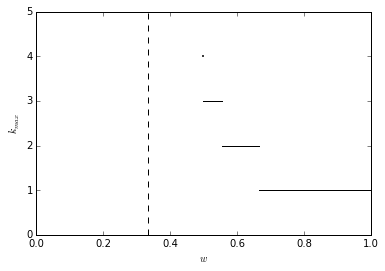

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1.0/3.0 , 1.0/3.0], [0, 5], 'k--')
plt.plot([0.499, 0.5], [4,4], 'k.', markersize=2)
plt.plot(np.linspace(0.5, 5.0/9.0, 100), [3] * 100, 'k-')
plt.plot(np.linspace(5.0/9.0, 2.0/3.0, 100), [2] * 100, 'k-')
plt.plot(np.linspace(2.0/3.0, 1, 100), [1] * 100, 'k-')
plt.xlim( (0, 1.0) )
plt.xlabel('$w$')
plt.ylabel('$k_{max}$')